# GRIP Technology Tasks: 3

# Explore Unsupervised Machine Learning

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans

# LOADING DATA

In [2]:
data='D:\The Spark Foundation\Iris.csv'
df=pd.read_csv(data)

# Data Analysis

In [19]:
Profile= ProfileReport(df)
Profile.to_notebook_iframe()

In [5]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data Visualization

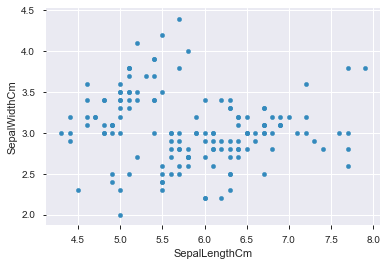

In [8]:
df.plot(kind='scatter', x='SepalLengthCm' ,y='SepalWidthCm')
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


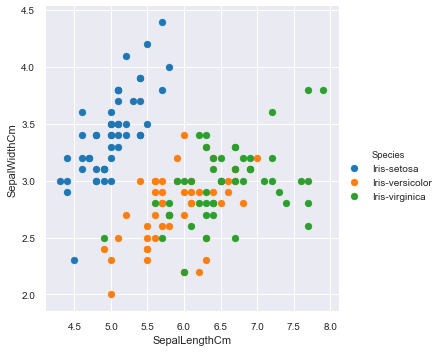

In [9]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter,"SepalLengthCm","SepalWidthCm" ).add_legend()
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


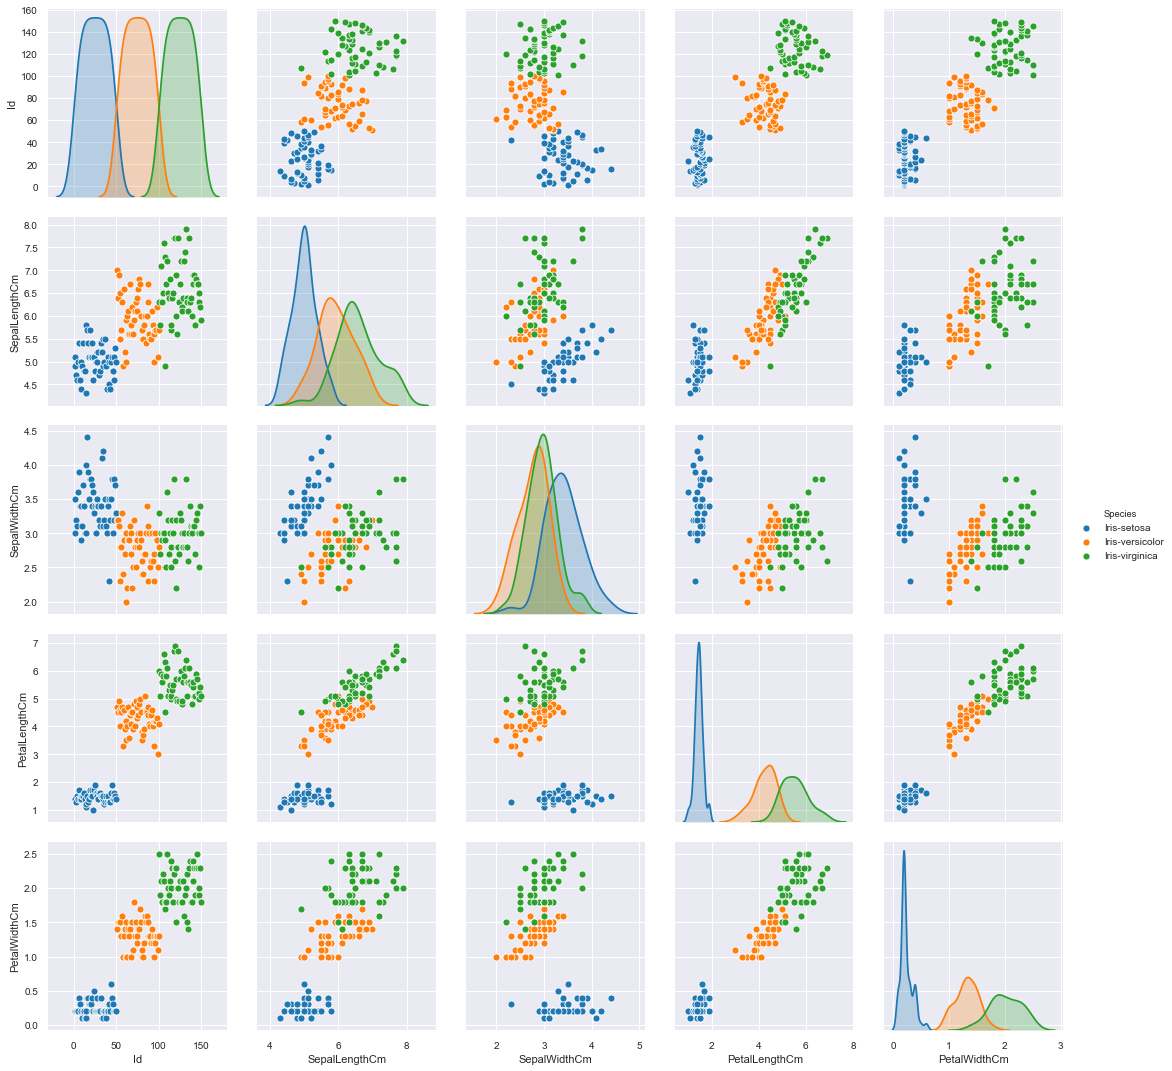

In [10]:
plt.close()
sns.set_style("darkgrid")
sns.pairplot(df,hue="Species", size=3, diag_kind="kde")
plt.show()

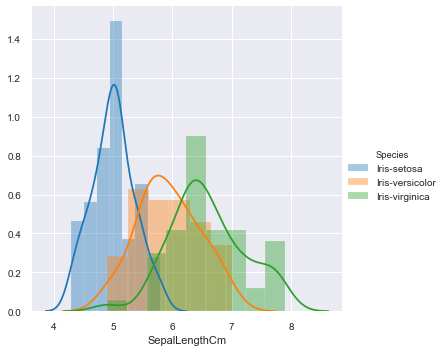

In [11]:
sns.FacetGrid(df, hue="Species", size=5).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

# Clustering

In [12]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [13]:
wcss=[]
for i in range(1, 11):
    kmns = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmns.fit(x)
    wcss.append(kmns.inertia_)

# Finding optimum number  using elbow method

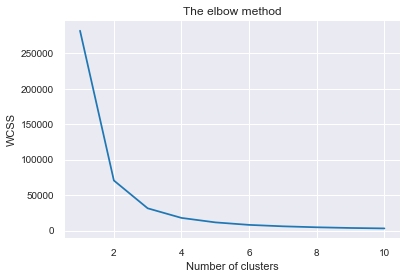

In [14]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Predictions 

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmns = kmeans.fit_predict(x)

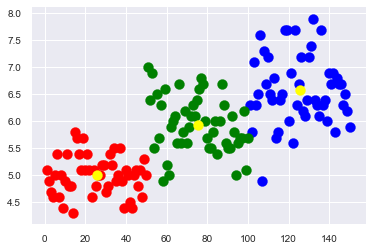

In [18]:
plt.scatter(x[y_kmns == 0, 0], x[y_kmns == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmns == 1, 0], x[y_kmns == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmns == 2, 0], x[y_kmns == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')